# Deep Learning on 10X Genomics 1.3M Mouse Brain Cells

#### Nikolay Oskolkov, SciLifeLab, NBIS Long Term Support, [nikolay.oskolkov@scilifelab.se](nikolay.oskolkov@scilifelab.se)

<h3><center>Abstract</center></h3>
Here we will discuss scalability of different scRNAseq dimensionality reduction techniques such as tSNE, FItSNE, UMAP, SCVIS and Autoencoders. We will demonstrate how to implement Autoencoders in Keras and TensorFlow on a large scRNAseq data set using 1.M Mouse Brain 10X Genomics data set as an example.

### Table of Contents:
* [Why scRNAseq is a paradise for Deep Learning?](#Why scRNAseq is a paradise for Deep Learning?)
* [Comparison of Dimensionality Reduction Methods](#Comparison of Dimensionality Reduction Methods)
* [Deep Autoencoder with Keras](#Deep Autoencoder with Keras)
* [Deep Autoencoder with TensorFlow](#Deep Autoencoder with TensorFlow)

### Why scRNAseq is a paradise for Deep Learning? <a class="anchor" id="Why scRNAseq is a paradise for Deep Learning?"></a>
In Single Cell OMICs area it is becoming a routine to sequence hundreds of thousands or even millions of single cells, data sets with **1.3M and >2M cells** are freely available. This superior statistical power opens new horizons for applying **Machine Learning and Deep Learning for Single Cell data annalysis**. Analytical challenge here is shifted from controlling for overfitting (a typical biological limit p >> n) to **watching out for underfitting (for Single Cell p << n)**, i.e. how to get the most out of your data.

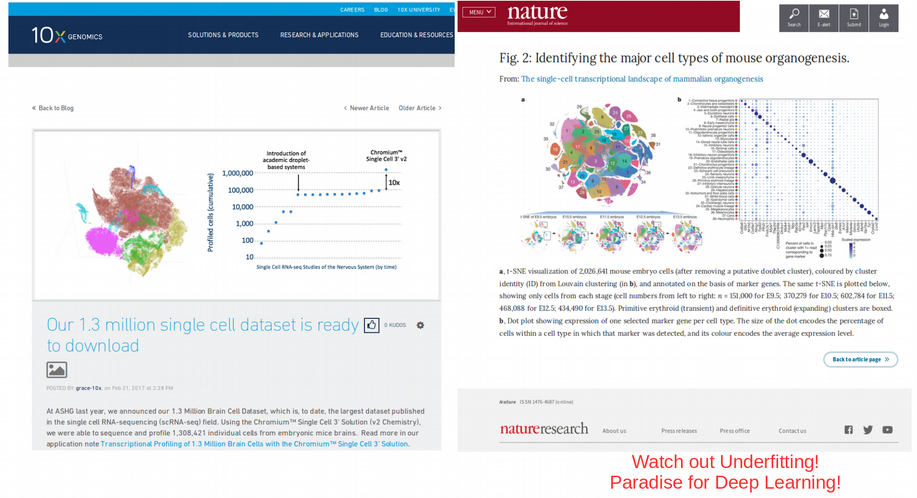

In [1]:
from IPython.display import Image
Image('/home/nikolay/WABI/Misc/SingleCell/Presentation/10X_Genomics_1.3M/10X_Genomics_1.3M.png')

Not only scRNAseq is experiencing a boom in Life Sciences but also Single Cell multi-OMICs technilogies (CITE-seq, scNMT etc.) are becoming more and more common. Recent advances in studying chromatine accessibility regions result in >100 000 single cells with scATACseq data. They alone presumably can not guerantee a novel way of discovering new cell populations (a primary goal of Single Cell data analysis) but provide tremendous potential for integration with scRNAseq and thus improvement of accuracy of assignment of single cells to a certain population.

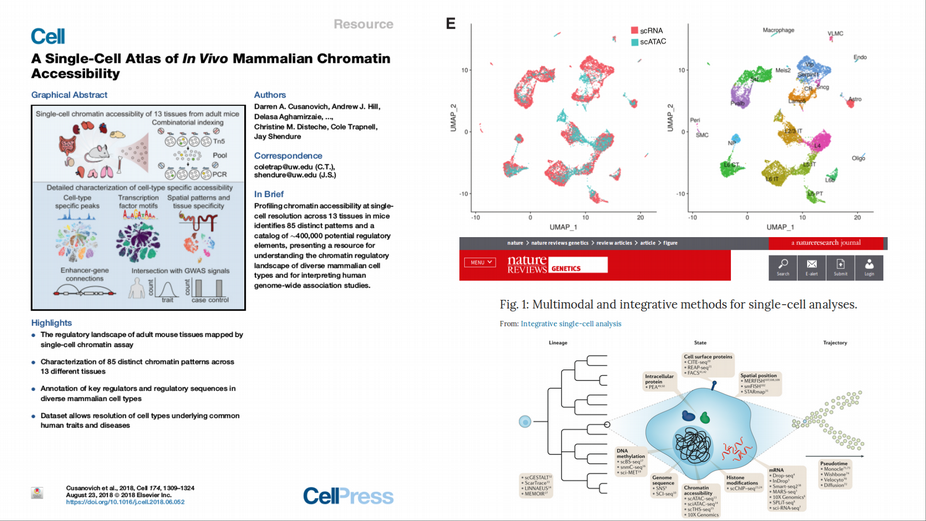

In [2]:
from IPython.display import Image
Image('/home/nikolay/WABI/Misc/SingleCell/Presentation/10X_Genomics_1.3M/scATACseq.png')

### Comparison of Dimensionality Reduction Methods <a class="anchor" id="Comparison of Dimensionality Reduction Methods"></a>

Here we demonstrate the striking difference between Linear (PCA) and Non-Linear (Autoencoder, tSNE) dimensionality reduction techniques for scRNAseq. In addition to poor scalability, tSNE experiences problems working with highly-dimensional data, so typically one performs a linear pre-dimenionality reduction with PCa before feeding it into tSNE. The pre-dimensionality reduction step can be done in a non-linear fashion as well with autoencoders where we feed the bottleneck of the Autoencoder into the tSNE which might lead to an improvement in cell clustering.

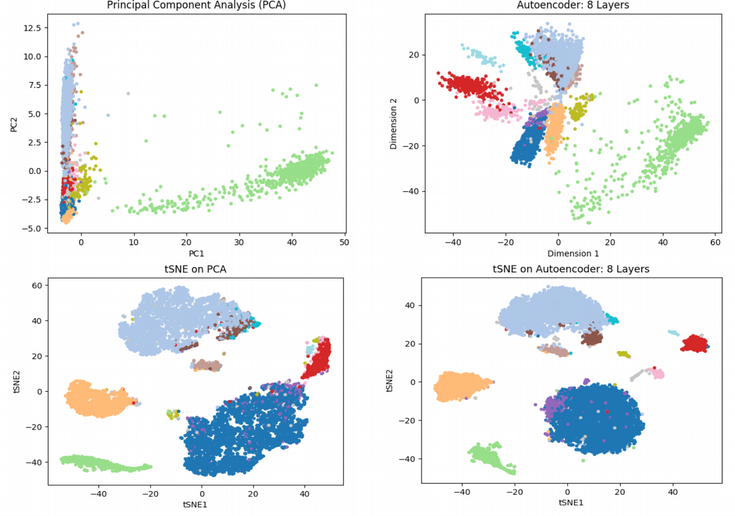

In [21]:
from IPython.display import Image
Image('/home/nikolay/WABI/Misc/SingleCell/Presentation/10X_Genomics_1.3M/CITEseq.png')

SCVIS is an interesting implementation of Variational Autoencoder where they seem to have found an optimal architecture of the neural network which perfoms fairly well on Single Cell data. Scalability is an issue again, it took me ~6h to run SCVIS on 10X Genomics 1.3M Mouse Brain cells.

In [26]:
# python scvis train --data_matrix_file 10X_1.3M_top100PCs.txt --out_dir out_scvis 
# --data_label_file 10X_1.3M_MouseBrain_CellAnnotationSeurat_res0.05_perp30.txt 
# --verbose --verbose_interval 50 --show_plot

FItSNE is another modification of Barnes-Hut tSNE which seems to scale better for big data. However I had enormous troubles with memory allocation which was never good enough. Particularly I wanted to reach high perplexities in order to check the global structure of the data but the max of perplexity which I was able to run on a 256GB RAM node was 350.

In [33]:
#library("data.table")
#source("fast_tsne.R")
#expr <- suppressWarnings(as.data.frame(fread("/home/nikolay/WABI/Misc/SingleCell/10X_Mouse_Brain_1.3M/10X_1.3M_reduced_19PCs.txt",sep="\t")))
#my_color<-as.numeric(as.character(expr$Cluster))
#expr$Cluster<-NULL
#expr<-as.data.frame(t(expr))
#N_cells<-dim(expr)[2]
#print(paste0("DATASET CONTAINS ",dim(expr)[1]," GENES AND ",N_cells," CELLS"))
#tsne_opt_perp <- fftRtsne(t(log10(expr+20)),check_duplicates=FALSE,perplexity=1143,dims=2,max_iter=1000)

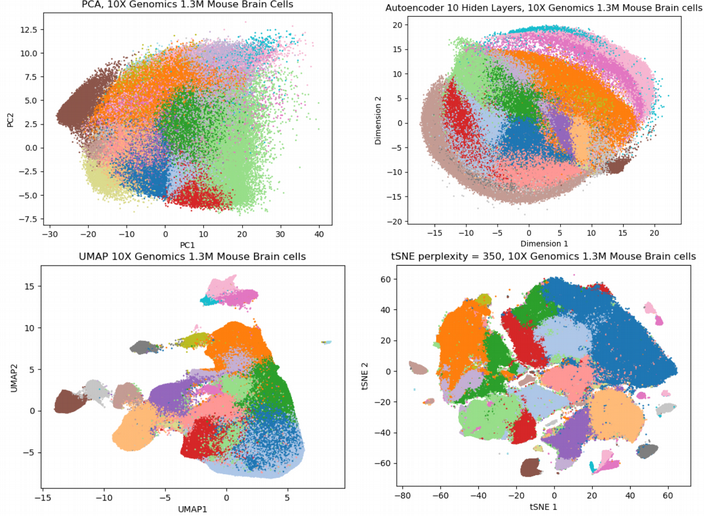

In [25]:
from IPython.display import Image
Image('/home/nikolay/WABI/Misc/SingleCell/Presentation/10X_Genomics_1.3M/10X_DimReduct.png')

In contrast UMAP seem like a very nice and fast alternative to tSNE. To my experience UMAP and Autoencoders are currently fastest non-linear dimensionality reduction methods which have a great potential for Single Cell OMICs area.

In [ ]:
# UNIFORM MANIFOLD APPROXIMATION AND PROJECTION (UMAP)
#print("Performing Uniform Manifold Approximation and Projection (UMAP) ...")
#model = UMAP(n_neighbors = 30, min_dist = 0.3, n_components = 2)
#umap = model.fit_transform(X_reduced)
#umap_coords = pd.DataFrame({'UMAP1':umap[:, 0], 'UMAP2':umap[:, 1]})
#umap_coords.to_csv('umap_coords_10X_1.3M_MouseBrain_min_dist_0.30.txt', sep='\t')
#plt.figure(figsize=(20, 15)) 
#plt.scatter(umap[:, 0], umap[:, 1], c = Y, cmap = 'tab20', s = 1)
#plt.title('UMAP')
#plt.xlabel("UMAP1")
#plt.ylabel("UMAP2")

### Deep Autoencoder with Keras <a class="anchor" id="Deep Autoencoder with Keras"></a>
However, gigantic sample sizes pose a few chellenges which are far beyond handling Big Data and scalability. The main chellenge is how to get maximum information out of the data. Linear Algebra formalism dominating in traditional analysis and programming is not good enough any more because we have the power to catch interesting non-linear effects. This is exactly the benifit of Deep Learning, the deeper you go the more interesting non-linear effects in the data you can discover. As scRNAseq analysis is predominantly based on Dimensionality Reduction and Clustering, a natural choice of a Neural Network to use is the Deep Autoencoder:

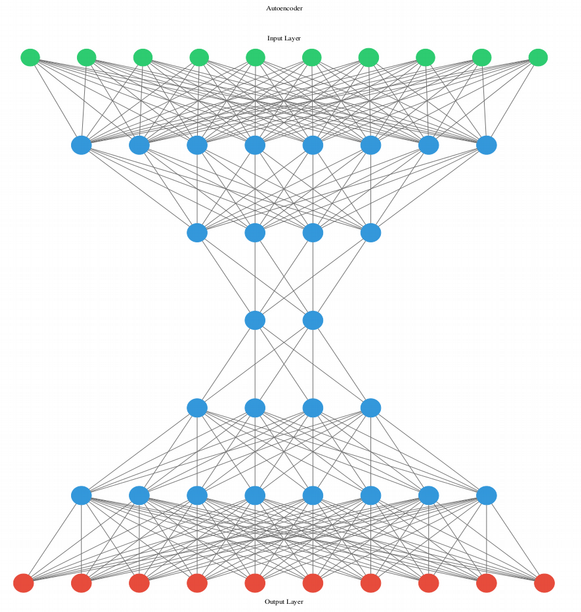

In [3]:
from IPython.display import Image
Image('/home/nikolay/WABI/Misc/SingleCell/Presentation/10X_Genomics_1.3M/autoencoder.png')

Here we will use the 1.3M Mouse Brain 10X genomics data set to give a flavor of how a Deep Autoencoder can be implemented in TensorFlow. A much more elaborated analysis will be presented later in the scRNAseq group discussion. TensorFlow is especially attractive for huge scRNAseq data sets because it is a very optimized and scalable language which was specifically created for working with large amounts of data.

In [6]:
import os
import sys
import keras
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.optimizers import Adam
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# READ DATA
os.chdir('/home/nikolay/WABI/Misc/SingleCell/10X_Mouse_Brain_1.3M/')
infile = 'MouseBrain_10X_1.3M_filtered_matrix_reduced_seurat_annot.txt'
print("\n" + "You specified input file: " + infile + "\n")

expr = pd.read_csv(infile, sep = '\t', dtype = np.int32, header = None)
print("\n" + "Dimensions of input file: " + str(expr.shape) + "\n")
print("\n" + "A few first lines of input file: " + "\n")
print(expr.iloc[0:4, 0:4])
print("\n" + "Last column corresponds to cluster assignments: " + "\n")
print(expr.iloc[0:4, (expr.shape[1]-4):expr.shape[1]])

# LOG-TRANSFORM DATA
X = expr.values[:,0:(expr.shape[1]-1)]
Y = expr.values[:,expr.shape[1]-1]
print("\n" + "You have following unique cluster labels: " + "\n")
print(set(Y))
print("\n" + "Log-transforming data..." + "\n")
X = np.float32( np.log(X + 1) )


You specified input file: MouseBrain_10X_1.3M_filtered_matrix_reduced_seurat_annot.txt


Dimensions of input file: (1306127, 228)


A few first lines of input file: 

    0  1  2  3
0  14  5  1  3
1   2  1  1  3
2   7  6  2  6
3   8  5  1  1

Last column corresponds to cluster assignments: 

   224  225  226  227
0   40   14   19    5
1   16    7    6    1
2   13    1    8    3
3   18    6   11    4

You have following unique cluster labels: 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

Log-transforming data...




Performing Principal Component Analysis (PCA) ...



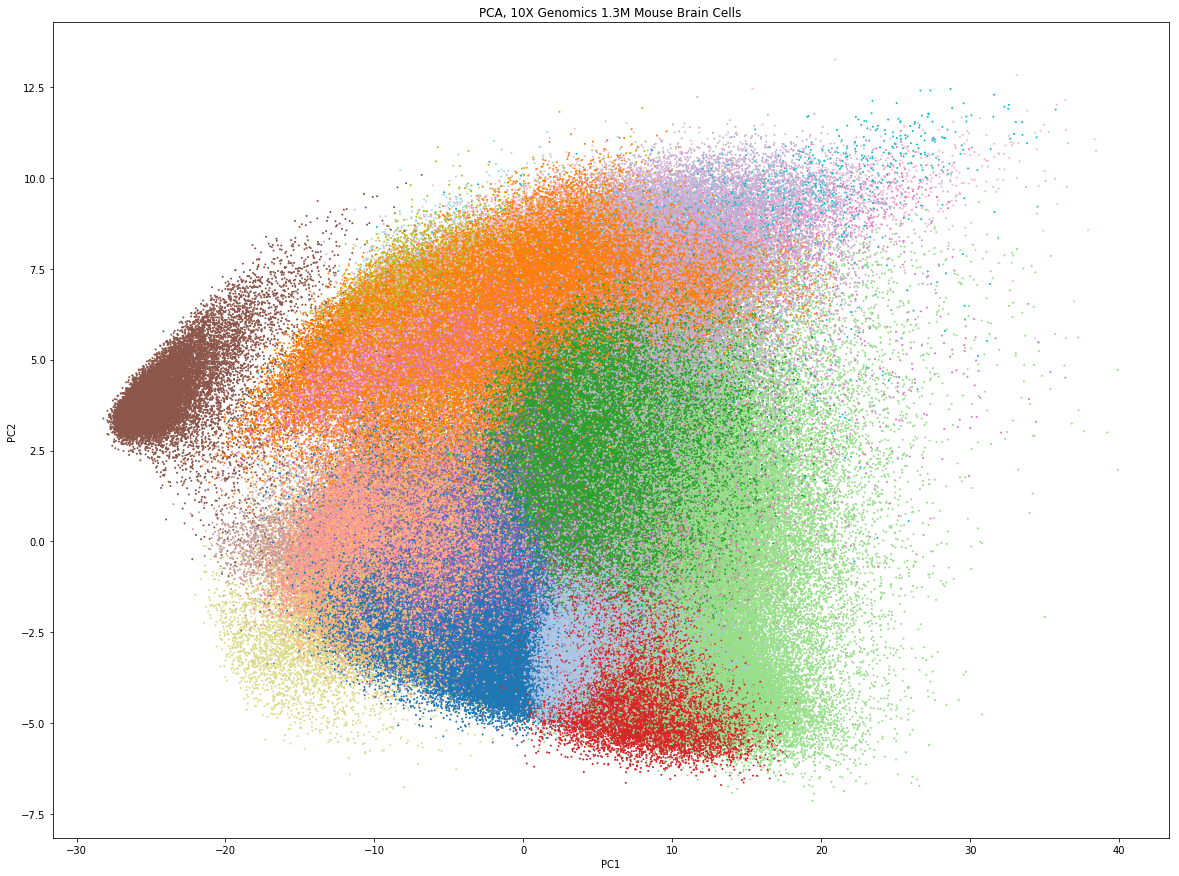


Dimensions of reduced data set: (1306127, 19)



In [7]:
# REDUCE DIMENSIONS WITH PRINCIPAL COMPONENT ANALYSIS (PCA)
print("\n" + "Performing Principal Component Analysis (PCA) ..." + "\n")
n_input = 19
x_train = PCA(n_components = n_input).fit_transform(X)
y_train = Y
plt.figure(figsize=(20, 15))
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train, cmap = 'tab20', s = 1)
plt.title('PCA, 10X Genomics 1.3M Mouse Brain Cells')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
x_train = MinMaxScaler().fit_transform(x_train)
print("\n" + "Dimensions of reduced data set: " + str(x_train.shape) + "\n")

As we can see the PCA looks messy, linear dimensionality reduction is clearly not good enough for capturing distinct scRNAseq clusters of Mouse Brain cells. We need a non-linear scalable dimenionality reduction such as a Deep Autoencoder. Potentially tSNE is the greatest choice for scRNAseq data visualization, however it has problems with scalability which Autoencoders do not have. Alternatively one can program tSNE in TensorFlow which should be the fastest implementation possible to date.

In [8]:
# REDUCE DIMENSIONS WITH AUTOENCODER
model = Sequential()
model.add(Dense(18,      activation='elu',     kernel_initializer='he_uniform', input_shape=(n_input,)))
model.add(Dense(17,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(16,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(15,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(14,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(13,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(12,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(11,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(10,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(9,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(8,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(7,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(6,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(5,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(4,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(3,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(2,       activation='linear',  kernel_initializer='he_uniform', name="bottleneck"))
model.add(Dense(3,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(4,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(5,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(6,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(7,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(8,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(9,       activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(10,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(11,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(12,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(13,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(14,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(15,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(16,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(17,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(18,      activation='elu',     kernel_initializer='he_uniform'))
model.add(Dense(n_input, activation='sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr = 0.0001))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 17)                323       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                255       
_________________________________________________________________
dense_5 (Dense)              (None, 14)                224       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                195       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                168       
__________


Training Loss:  0.00531095281218


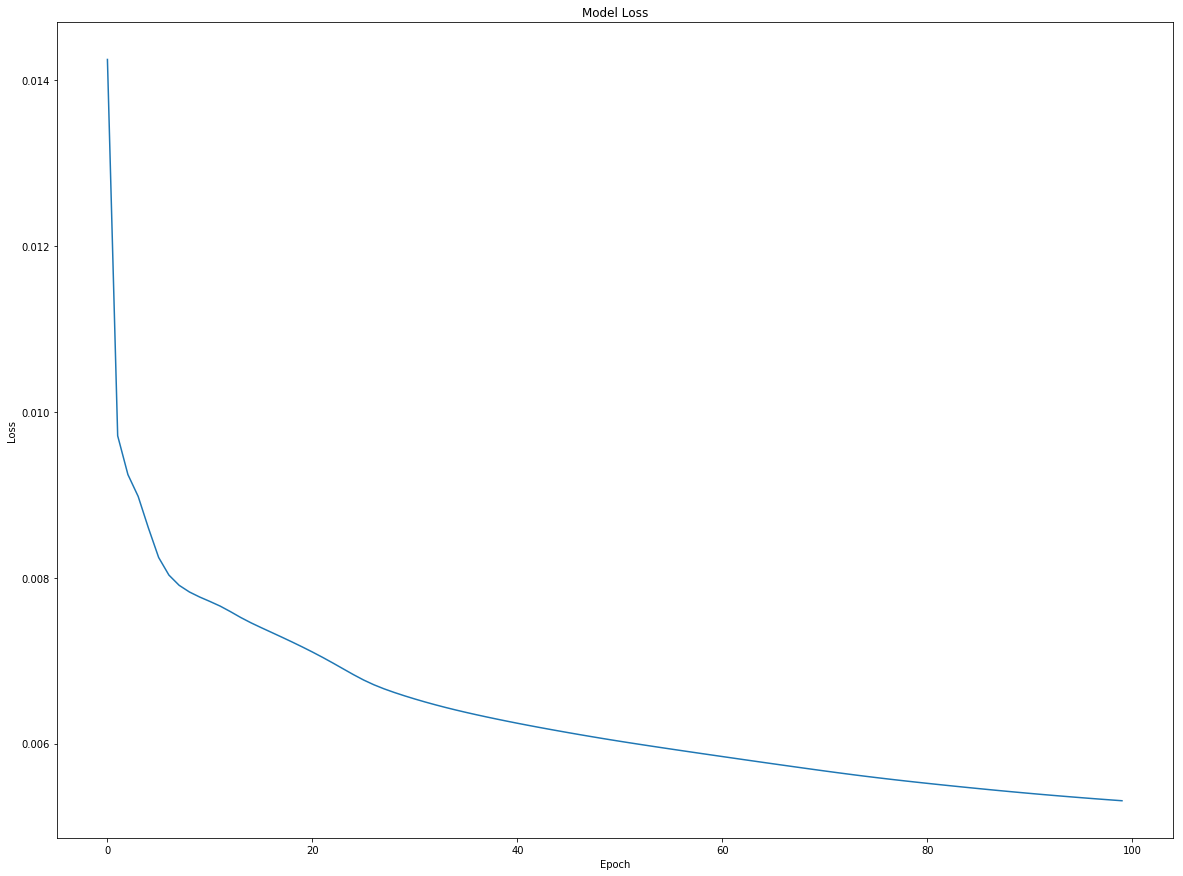

In [9]:
history = model.fit(x_train, x_train, batch_size = 4096, epochs = 100, shuffle = False, verbose = 0)
print("\n" + "Training Loss: ", history.history['loss'][-1])
plt.figure(figsize=(20, 15))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Let us plot the bottleneck of the Autoencoder:

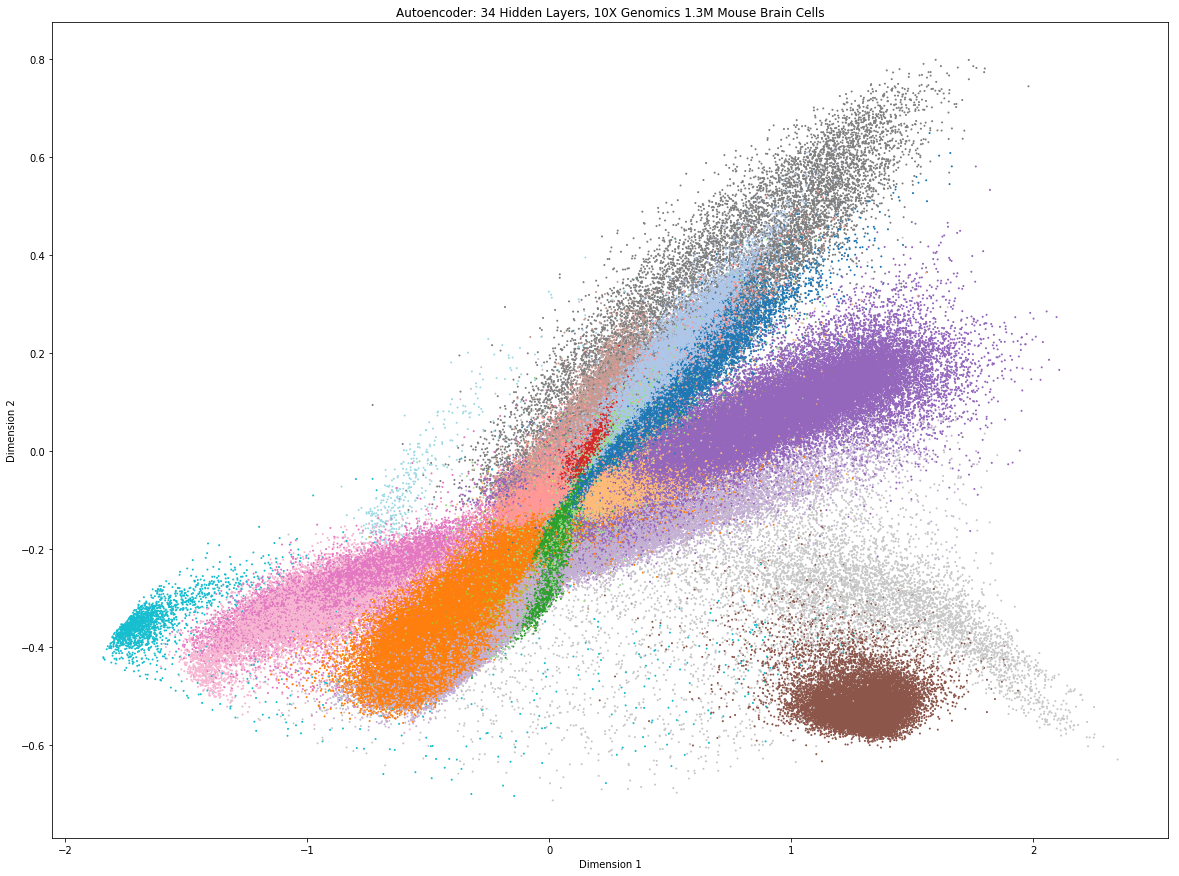

In [10]:
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train)

# PLOT DIMENSIONALITY REDUCTION
plt.figure(figsize=(20, 15))
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], c = Y, s = 1, cmap = 'tab20')
plt.title('Autoencoder: 34 Hidden Layers, 10X Genomics 1.3M Mouse Brain Cells')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

### Deep Autoencoder with TensorFlow <a class="anchor" id="Deep Autoencoder with TensorFlow"></a>
Now let us construct an Autoencoder model with 8 hidden layers using TensorFlow. By analogy with the Keras model, we will use scales top 19 significant Principal Components as input data:

In [39]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

X = x_train

# DEFINE HYPERPARAMETERS
learning_rate   = 0.001
training_epochs = 500
mini_batch_size = 1024           # mini_batch_size = X.shape[0]-1 corresponds to no mini-batches used
display_step    = 10             # how often to display updates on loss and accuracy
num_hidden_1    = 12             # 1st hidden layer num features
num_hidden_2    = 8              # 2nd hidden layer num features
num_hidden_3    = 4              # 3-d hidden layer num features
num_bottleneck  = 2              # bottleneck num features
num_input       = X.shape[1]     # scRANAseq data input (number of features / genes)

# TENSORFLOW GRAPH INPUT
x = tf.placeholder("float")
y = tf.placeholder("float")

weights = {
    'encoder_h1':  tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2':  tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h3':  tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'bottleneck':  tf.Variable(tf.random_normal([num_hidden_3, num_bottleneck])),
    'decoder_h1':  tf.Variable(tf.random_normal([num_bottleneck, num_hidden_3])),
    'decoder_h2':  tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h3':  tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_out': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1':  tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2':  tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b3':  tf.Variable(tf.random_normal([num_hidden_3])),
    'bottleneck':  tf.Variable(tf.random_normal([num_bottleneck])),
    'decoder_b1':  tf.Variable(tf.random_normal([num_hidden_3])),
    'decoder_b2':  tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b3':  tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_out': tf.Variable(tf.random_normal([num_input])),
}

# CONSTRUCT AUTOENCODER MODEL
print("\n" + "Constructing Autoencoder Model ..." + "\n")
def encoder(x):
    layer_1 = tf.nn.elu(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.elu(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    layer_3 = tf.nn.elu(tf.add(tf.matmul(layer_2, weights['encoder_h3']), biases['encoder_b3']))
    bottleneck = tf.add(tf.matmul(layer_3, weights['bottleneck']), biases['bottleneck'])
    return bottleneck

def decoder(x):
    layer_1 = tf.nn.elu(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.elu(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    layer_3 = tf.nn.elu(tf.add(tf.matmul(layer_2, weights['decoder_h3']), biases['decoder_b3']))
    layer_out = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_out']), biases['decoder_out']))
    return layer_out
    
encoder_op = encoder(x)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = x
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)    
    
# START TRAINING AUTOENCODER
print("\n" + "Start Training Autoencoder ..." + "\n")
my_cost = []
tf.set_random_seed(12)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        pos = 0
        idx = np.arange(X.shape[0])
        my_cost_mini_batch = []
        for _ in range(10000000):
            #print('Mini-batch {0} - {1}'.format(pos,pos + mini_batch_size))
            if pos + mini_batch_size >= X.shape[0]:
                break
            batch_x = X[idx[range(pos, pos + mini_batch_size)],:]
            c,_ = sess.run([cost, optimizer], feed_dict={x: batch_x})
            my_cost_mini_batch.append(c)
            pos = pos + mini_batch_size
        my_cost.append(np.mean(my_cost_mini_batch))
        if (epoch + 1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost = ", "{:.9f}".format(np.mean(my_cost_mini_batch)))
    pred = sess.run(encoder(x), feed_dict={x: X})


Constructing Autoencoder Model ...


Start Training Autoencoder ...

Epoch: 0010 cost =  0.020335933
Epoch: 0020 cost =  0.007066345
Epoch: 0030 cost =  0.006701055
Epoch: 0040 cost =  0.006509758
Epoch: 0050 cost =  0.006396726
Epoch: 0060 cost =  0.006270951
Epoch: 0070 cost =  0.006122339
Epoch: 0080 cost =  0.006018450
Epoch: 0090 cost =  0.005886464
Epoch: 0100 cost =  0.005780080
Epoch: 0110 cost =  0.005696721
Epoch: 0120 cost =  0.005638198
Epoch: 0130 cost =  0.005592236
Epoch: 0140 cost =  0.005552474
Epoch: 0150 cost =  0.005498252
Epoch: 0160 cost =  0.005447337
Epoch: 0170 cost =  0.005414370
Epoch: 0180 cost =  0.005390725
Epoch: 0190 cost =  0.005367743
Epoch: 0200 cost =  0.005338068
Epoch: 0210 cost =  0.005294271
Epoch: 0220 cost =  0.005257748
Epoch: 0230 cost =  0.005234732
Epoch: 0240 cost =  0.005217253
Epoch: 0250 cost =  0.005199939
Epoch: 0260 cost =  0.005181186
Epoch: 0270 cost =  0.005159967
Epoch: 0280 cost =  0.005137034
Epoch: 0290 cost =  0.005114397
Ep

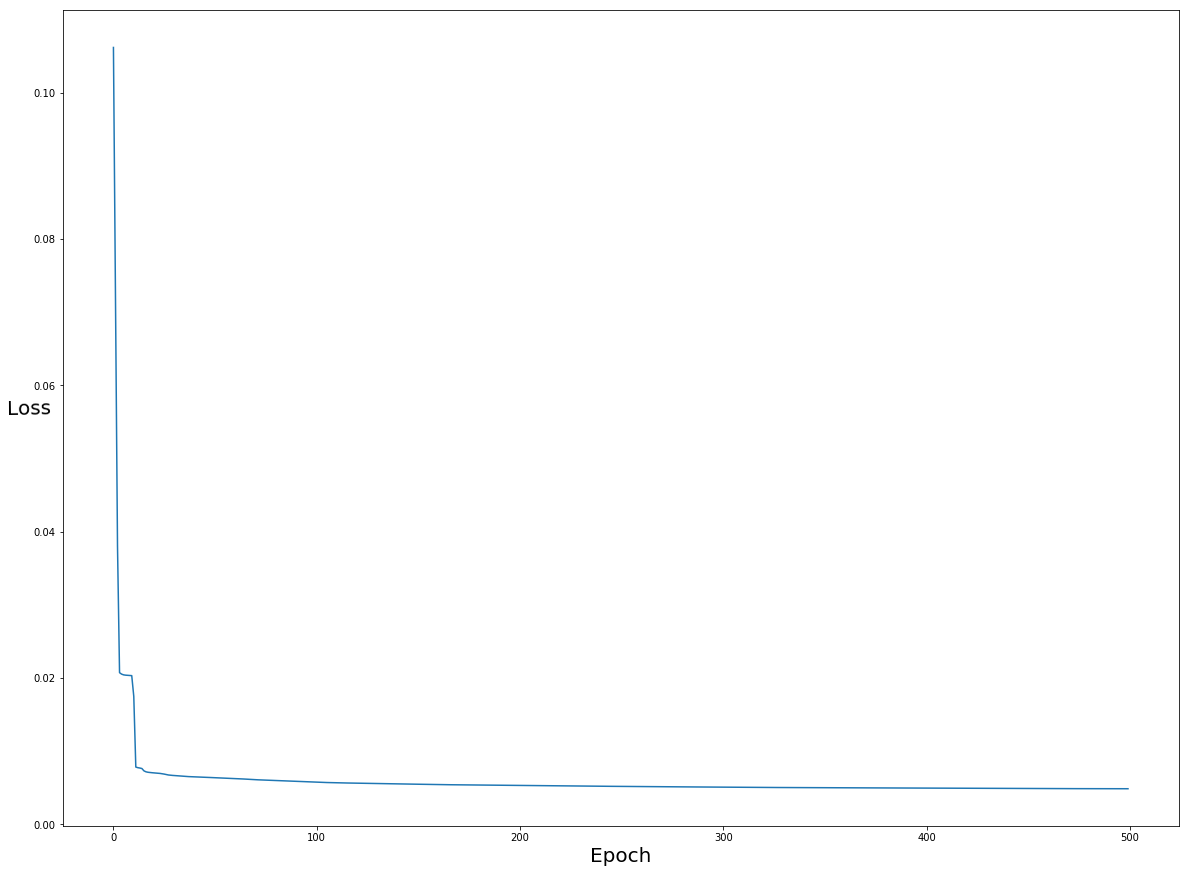

In [40]:
plt.figure(figsize=(20, 15))
plt.plot(range(training_epochs), my_cost)
plt.xlabel("Epoch",fontsize = 20)
plt.ylabel("Loss",fontsize = 20, rotation = 1)
plt.show()

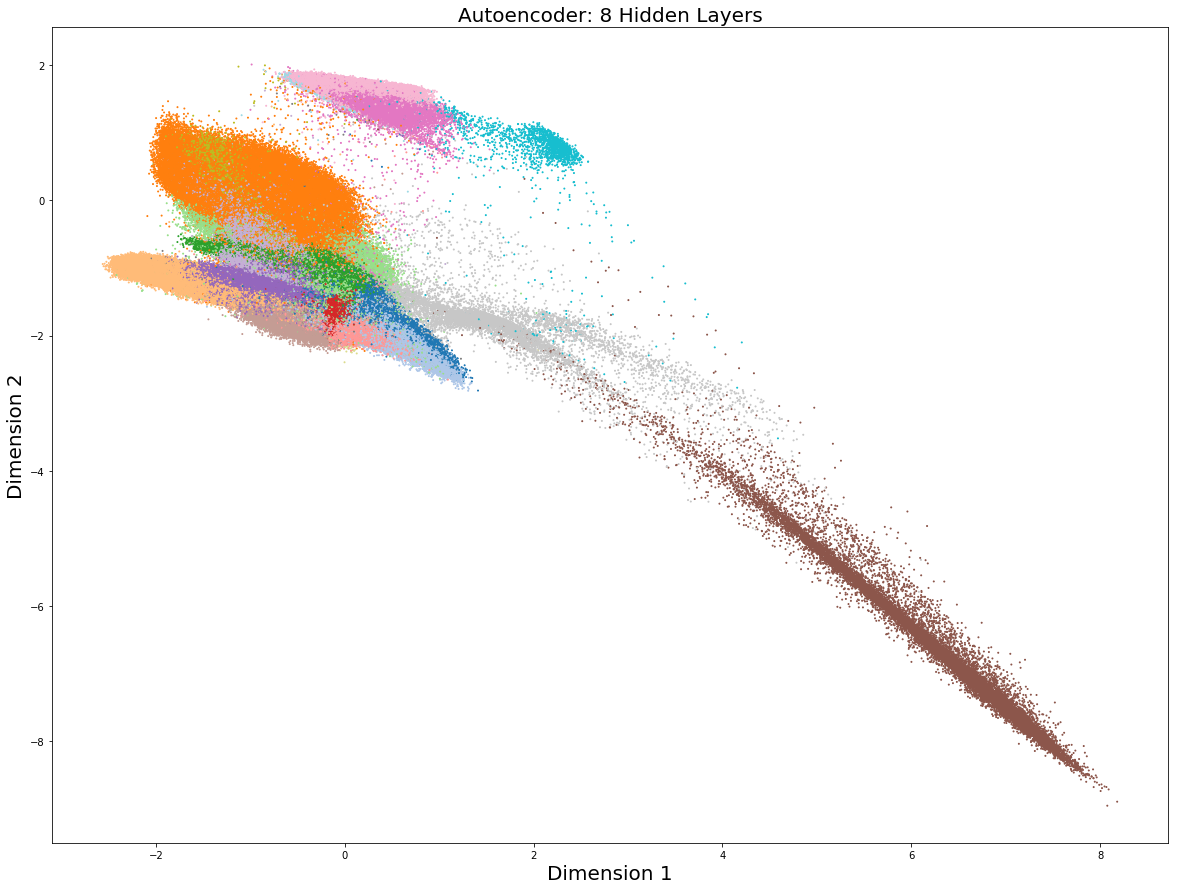

In [41]:
# VISUALIZE AUTOENCODER BOTTLENECK
plt.figure(figsize=(20, 15))
plt.scatter(pred[:,0], pred[:,1], c = Y, s = 1, cmap = 'tab20')
plt.title('Autoencoder: 8 Hidden Layers', fontsize = 20)
plt.xlabel("Dimension 1", fontsize = 20)
plt.ylabel("Dimension 2", fontsize = 20)
plt.show()